# Economics

## Notebook Links:
[Home](index.ipynb)

[Resale Market](resales.ipynb)

[Construction/Starts](starts.ipynb)

[Rental Market](rental.ipynb)

[Economic Drivers](economics.ipynb)

[Demograhics/Migration](demographics.ipynb)

## HTML Links:
[Home](index.html)

[Resale Market](resales.html)

[Construction/Starts](starts.html)

[Rental Market](rental.html)

[Economic Drivers](economics.html)

[Demograhics/Migration](demographics.html)

In [3]:
from stats_can import StatsCan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#seaborn theme
import seaborn as sns
sns.set(font='Arial')

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [4]:
sc = StatsCan()
sc.update_tables()
#df = sc.table_to_df('14-10-0378-01')


14100378-eng.zip: 100%|██████████| 24.3M/24.3M [00:07<00:00, 3.28MB/s]


## Labour Market
Source: Statistics Canada, 14-10-0378-01

In [6]:
calgary = df[df['GEO']=="Calgary, Alberta"]
calgary = calgary[calgary['Sex']=='Both sexes']
calgary = calgary.filter(items = ['REF_DATE','Labour force characteristics','Age group','UOM', 'VALUE'])
calgary.rename(columns={'REF_DATE':'Date'},inplace=True)
cal_unadj = calgary[(calgary['UOM']=='Persons') ]
cal_tot = cal_unadj[cal_unadj['Age group']=='15 years and over']
cal_pivot = cal_tot.pivot(index='Date', columns = ['Labour force characteristics'],values ='VALUE')


In [7]:
cal_pivot.columns=cal_pivot.columns.tolist()
cal_pivot['Participation Rate']=(cal_pivot['Labour force']/cal_pivot['Population'])*100
cal_pivot['Unemployment Rate']=(cal_pivot['Unemployment']/cal_pivot['Labour force'])*100
cal_pivot['Employment Rate']=(cal_pivot['Employment']/cal_pivot['Labour force'])*100

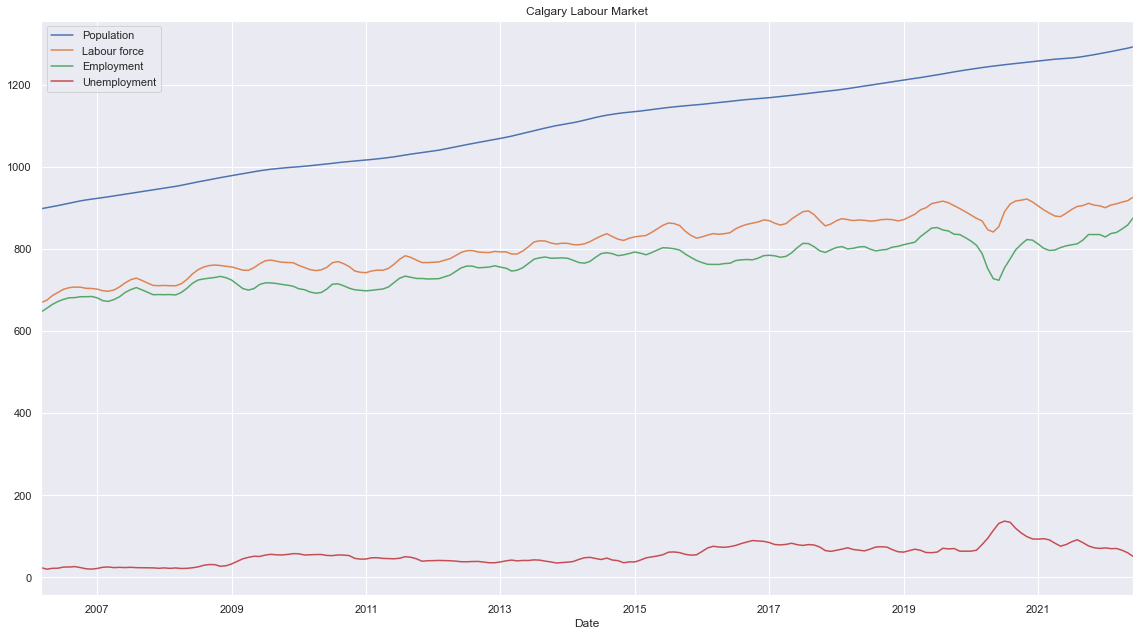

In [8]:
cal_pivot[['Population','Labour force', 'Employment','Unemployment']].plot(figsize = (16,9),kind='line', title = 'Calgary Labour Market')

plt.tight_layout()
plt.savefig('kbase_graphs/labour_mkt.png')

While population and labour force has been steadily growing in Calgary for the past 2 decades, unemployment has also increased, and stayed high since 2015. On the other hand, employment numbers have not caught up - mainly due to the impact of the local energy sector. 

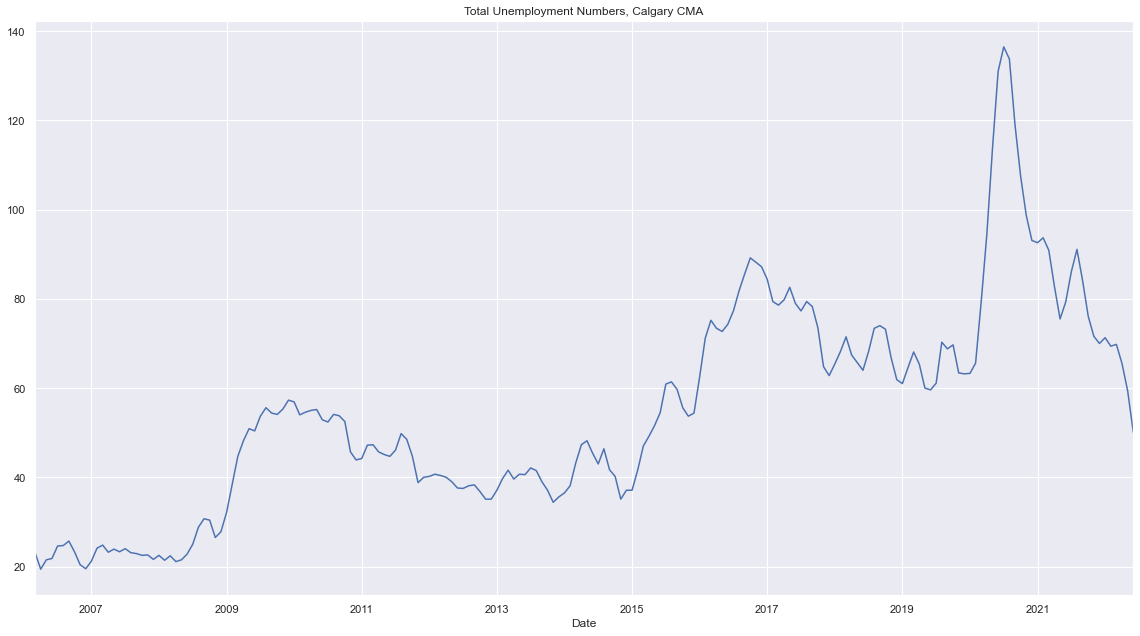

In [9]:
cal_pivot['Unemployment'].plot(figsize = (16,9),kind='line', title = 'Total Unemployment Numbers, Calgary CMA')
plt.tight_layout()
plt.savefig('kbase_graphs/unemploy.png')

A closer look on unemployment rates show that the spike of total unemployment due to the pandemic has mostly recovered, and is back to pre-COVID levels. However, unemployment is still significantly higher than pre-Oil bust levels in 2014. 

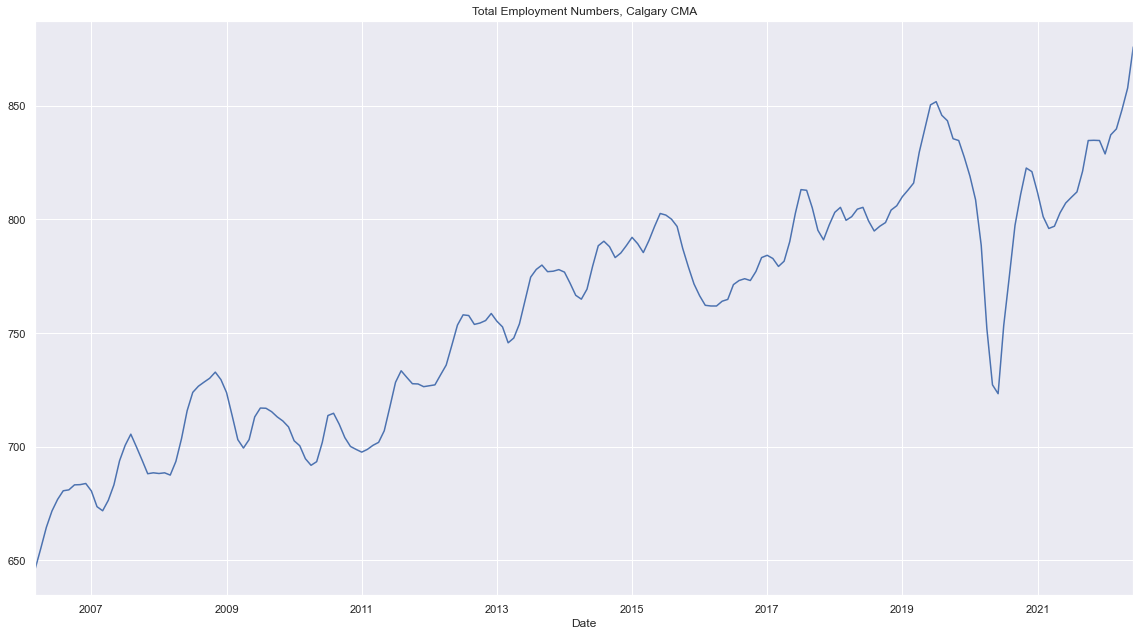

In [10]:
cal_pivot['Employment'].plot(figsize = (16,9),kind='line', title = 'Total Employment Numbers, Calgary CMA')
plt.tight_layout()
plt.savefig('kbase_graphs/employ.png')

Similarly, employment numbers are almost at previous all time highs in 2019, and is on an upward trend - from growth in labour force and population.

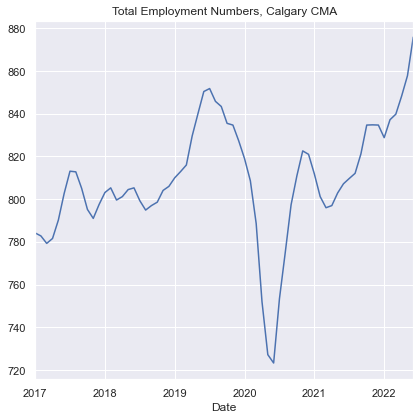

In [11]:
cal_pivot['Employment']['2017':].plot(figsize = (6,6),kind='line', title = 'Total Employment Numbers, Calgary CMA')
plt.tight_layout()

plt.savefig('kbase_graphs/cal_employ_short.png')

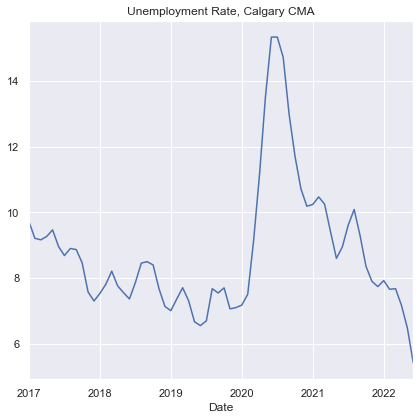

In [12]:
cal_pivot['Unemployment Rate']['2017':].plot(figsize = (6,6),kind='line', title = 'Unemployment Rate, Calgary CMA')
plt.tight_layout()

plt.savefig('kbase_graphs/cal_unemploy_short.png')

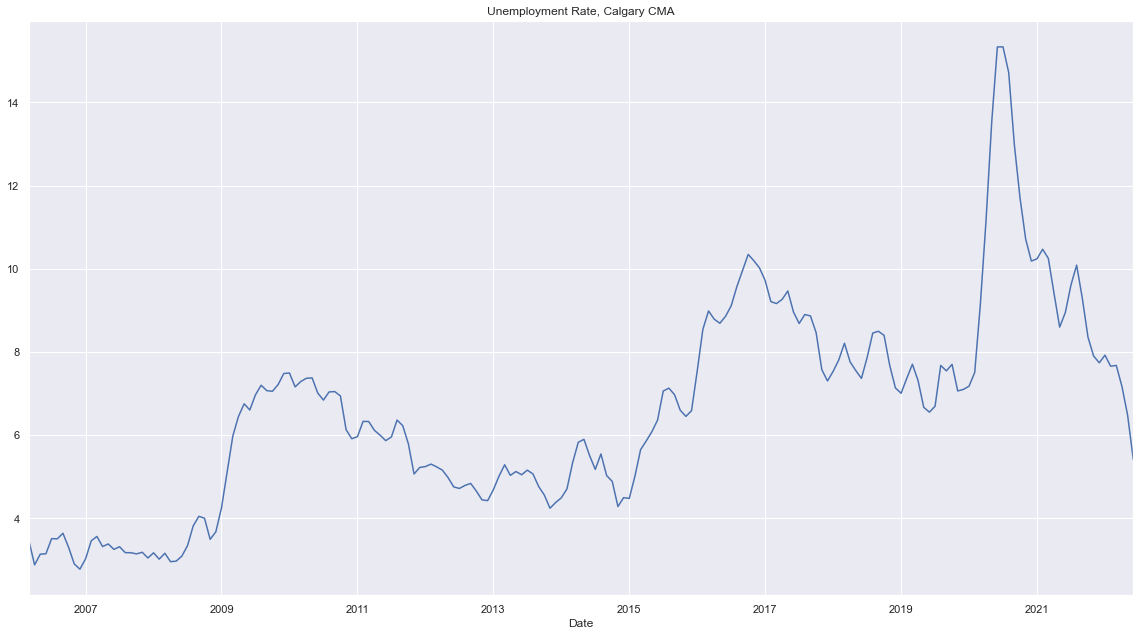

In [13]:
cal_pivot['Unemployment Rate'].plot(figsize=(16,9), title='Unemployment Rate, Calgary CMA')
plt.tight_layout()
plt.savefig('kbase_graphs/cal_cma_unemploy_rate.png')

A similar view with the unemployment rate.

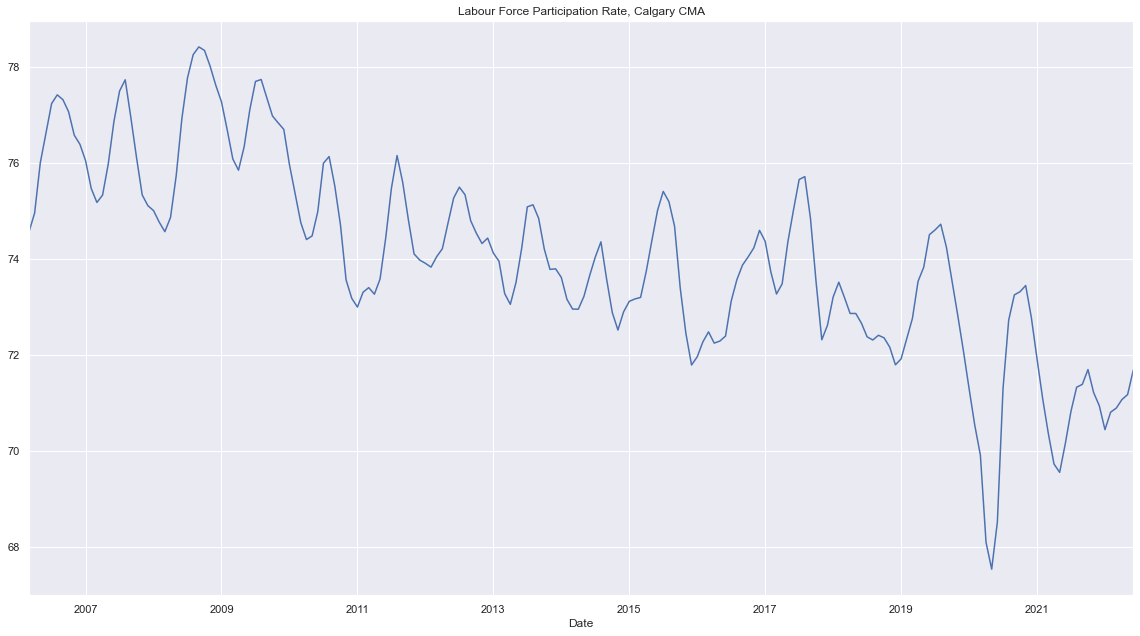

In [14]:
cal_pivot['Participation Rate'].plot(figsize=(16,9), title='Labour Force Participation Rate, Calgary CMA')
plt.tight_layout()

plt.savefig('kbase_graphs/cal_participation_rate.png')

Interestingly, labour force participation has been on a downtrend since 2009, and is still well below pre-COVID levels currently. While it has bounced back from the lows in March 2020, a significant part of the population is still shying away from the workforce.

In [15]:
cal_pivot.tail(36)

,Population,Labour force,Employment,Full-time employment,Part-time employment,Unemployment,Not in labour force,Participation Rate,Unemployment Rate,Employment Rate
Date,,,,,,,,,,
2019-07-01,1223.9,913.0,851.8,709.3,142.6,61.1,310.9,74.597598,6.692223,93.296824
2019-08-01,1226.1,916.1,845.8,712.5,133.2,70.3,310.1,74.716581,7.673835,92.326165
2019-09-01,1228.6,912.1,843.4,700.6,142.7,68.8,316.5,74.238971,7.543033,92.467931
2019-10-01,1231.0,905.2,835.5,693.3,142.2,69.7,325.7,73.533712,7.699956,92.300044
2019-11-01,1233.3,898.1,834.7,680.8,153.9,63.4,335.2,72.820887,7.059348,92.940652
2019-12-01,1235.4,890.5,827.3,667.8,159.5,63.2,345.0,72.081917,7.097136,92.902864
2020-01-01,1237.5,882.3,819.0,657.3,161.7,63.3,355.1,71.296970,7.174430,92.825570
2020-02-01,1239.4,874.2,808.6,651.4,157.2,65.6,365.2,70.534129,7.504004,92.495996
2020-03-01,1241.5,867.9,788.6,647.3,141.3,79.4,373.6,69.907370,9.148519,90.863003


## 15-24 Labour

In [16]:
cal_15to24 = cal_unadj[cal_unadj['Age group']=='15 to 24 years']

cal_15to24_pivot =cal_15to24.pivot(index='Date', columns = ['Labour force characteristics'],values ='VALUE')
cal_15to24_pivot.columns=cal_15to24_pivot.columns.tolist()
cal_15to24_pivot['Participation Rate']=(cal_15to24_pivot['Labour force']/cal_15to24_pivot['Population'])*100
cal_15to24_pivot['Unemployment Rate']=(cal_15to24_pivot['Unemployment']/cal_15to24_pivot['Labour force'])*100
cal_15to24_pivot['Employment Rate']=(cal_15to24_pivot['Employment']/cal_15to24_pivot['Labour force'])*100
cal_15to24_pivot.tail(12)

,Population,Labour force,Employment,Full-time employment,Part-time employment,Unemployment,Not in labour force,Participation Rate,Unemployment Rate,Employment Rate
Date,,,,,,,,,,
2021-07-01,187.4,121.7,96.8,54.5,42.3,24.9,65.7,64.941302,20.460148,79.539852
2021-08-01,181.8,123.3,97.7,54.5,43.3,25.6,58.5,67.821782,20.762368,79.237632
2021-09-01,182.5,118.5,96.4,51.6,44.9,22.1,63.9,64.931507,18.649789,81.350211
2021-10-01,184.3,113.5,95.0,47.1,47.9,18.6,70.7,61.584373,16.387665,83.700441
2021-11-01,191.1,112.0,95.9,44.1,51.8,16.2,79.1,58.608059,14.464286,85.625000
2021-12-01,192.2,114.5,100.1,46.3,53.8,14.4,77.7,59.573361,12.576419,87.423581
2022-01-01,195.3,116.4,101.8,44.9,56.9,14.6,78.9,59.600614,12.542955,87.457045
2022-02-01,196.6,117.3,103.4,43.2,60.2,13.9,79.2,59.664293,11.849957,88.150043
2022-03-01,200.0,118.2,103.2,37.5,65.6,15.1,81.8,59.100000,12.774958,87.309645


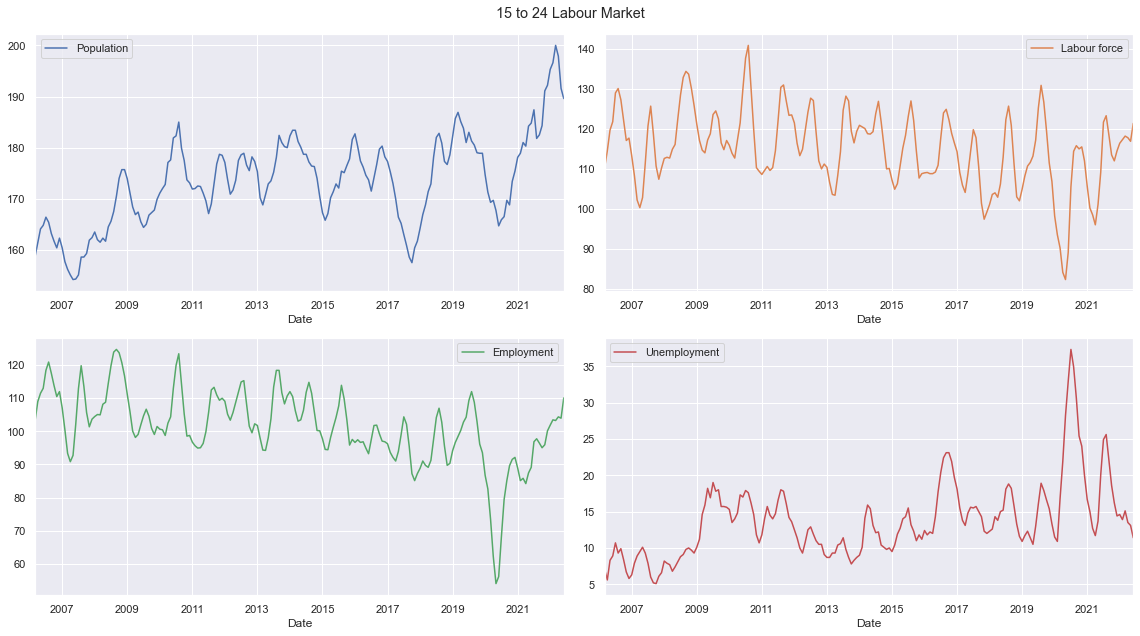

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(16,9))

cal_15to24_pivot[['Population','Labour force', 'Employment','Unemployment']].plot(ax= axes,subplots=True, title = '15 to 24 Labour Market')
plt.tight_layout()
plt.savefig('kbase_graphs/15to24market.png')

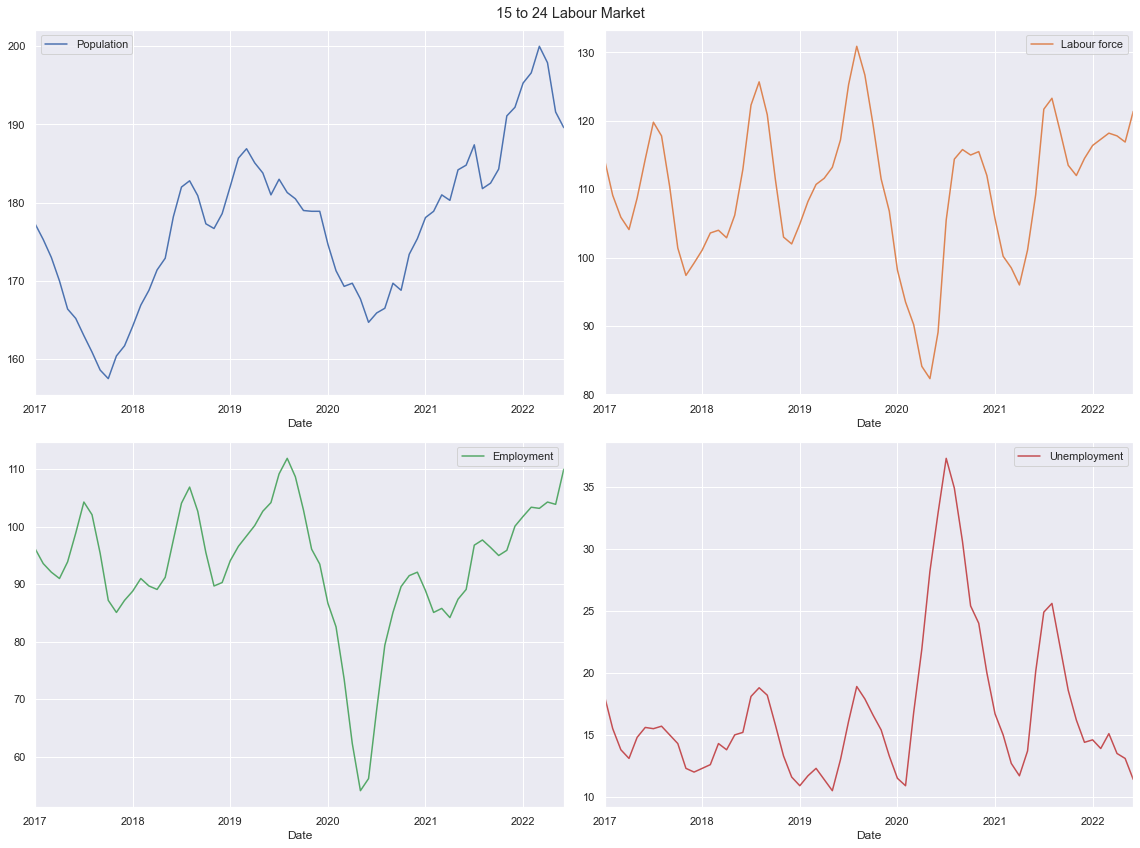

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(16,12))

cal_15to24_pivot['2017':][['Population','Labour force', 'Employment','Unemployment']].plot(ax= axes,subplots=True, title = '15 to 24 Labour Market')
plt.tight_layout()
plt.savefig('kbase_graphs/15to24market_recent.png')

Estimated population in the 15 to 24 age bracket finally broke out to all time highs in 2021, after over 10 years of stagnation between a range. As this happened, employment and labour force has returned to similar pre-COVID levels. 

This may indicate a higher propensity of younger age people in working, or looking for work post-pandemic heights.

As the most likely age group to be renters - employment in the 15 to 24 cohort is an important indicator for rental demand.

## 25 to 44 Labour Market

In [19]:
cal_25to44 = cal_unadj[cal_unadj['Age group']=='25 to 44 years']
cal_25to44_pivot =cal_25to44.pivot(index='Date', columns = ['Labour force characteristics'],values ='VALUE')

cal_25to44_pivot.columns=cal_25to44_pivot.columns.tolist()
cal_25to44_pivot['Participation Rate']=(cal_25to44_pivot['Labour force']/cal_25to44_pivot['Population'])*100
cal_25to44_pivot['Unemployment Rate']=(cal_25to44_pivot['Unemployment']/cal_25to44_pivot['Labour force'])*100
cal_25to44_pivot['Employment Rate']=(cal_25to44_pivot['Employment']/cal_25to44_pivot['Labour force'])*100
cal_25to44_pivot.tail(12)


,Population,Labour force,Employment,Full-time employment,Part-time employment,Unemployment,Not in labour force,Participation Rate,Unemployment Rate,Employment Rate
Date,,,,,,,,,,
2021-07-01,465.5,404.0,373.5,331.7,41.7,30.5,61.5,86.788400,7.549505,92.450495
2021-08-01,465.5,402.4,368.6,325.5,43.1,33.7,63.2,86.444683,8.374751,91.600398
2021-09-01,474.5,412.6,380.3,335.5,44.8,32.3,61.9,86.954689,7.828405,92.171595
2021-10-01,480.8,421.1,392.5,345.6,47.0,28.6,59.7,87.583195,6.791736,93.208264
2021-11-01,483.9,426.6,399.9,348.9,51.0,26.7,57.3,88.158710,6.258790,93.741210
2021-12-01,481.8,423.3,399.0,348.1,51.0,24.3,58.5,87.858032,5.740609,94.259391
2022-01-01,477.5,420.9,395.8,340.6,55.2,25.0,56.6,88.146597,5.939653,94.036588
2022-02-01,485.6,430.3,404.3,345.6,58.8,26.0,55.3,88.612026,6.042296,93.957704
2022-03-01,489.2,435.2,407.5,347.9,59.6,27.8,53.9,88.961570,6.387868,93.635110


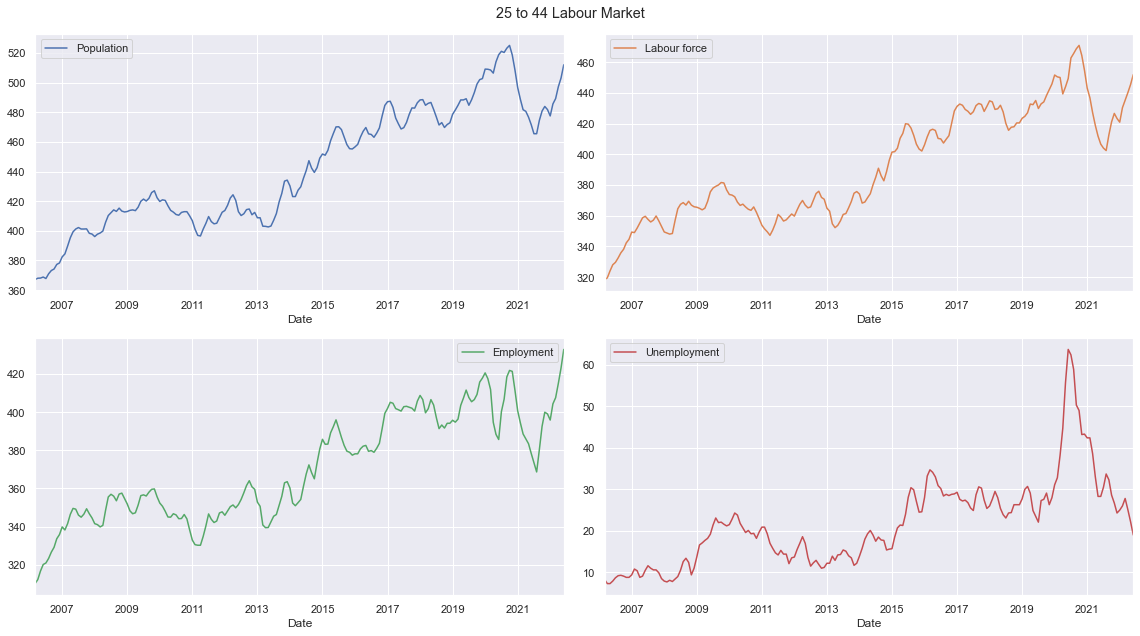

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(16,9))

cal_25to44_pivot[['Population','Labour force', 'Employment','Unemployment']].plot(ax= axes,subplots=True,title = '25 to 44 Labour Market')
plt.tight_layout()
plt.savefig('kbase_graphs/25to44market.png')

Conversely, the population estimate for the 25 to 44 cohort is still well below pre-COVID highs. Similarly, the labour force has not recovered to pre-COVID levels. While unemployment has fallen, total employment levels remain slightly below 2019 highs. 

As this population cohort are the most likely to be first-time homebuyers, weaker employment conditions may result in less relative demand for entry-level homes.

## Job Vacancy & Wage Survey

In [21]:
vacancy = sc.table_to_df('14-10-0325')


In [22]:
vacancy=vacancy.rename({'REF_DATE':'Date'},axis=1)
cal_jwvs=vacancy[vacancy['GEO']=='Calgary, Alberta']
cal_jwvs=cal_jwvs.filter(items = ['Date','Statistics','SCALAR_FACTOR','UOM', 'VALUE','STATUS'])
cal_jwvs_pivot = cal_jwvs.pivot(index='Date', columns = 'Statistics',values ='VALUE')

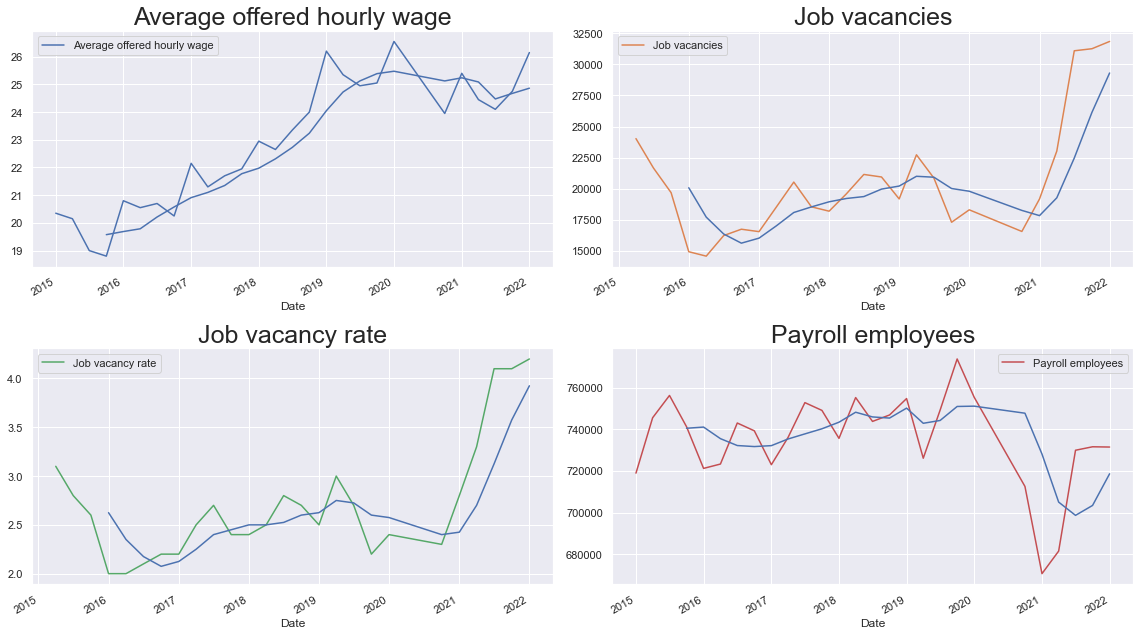

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(16,9))


cal_jwvs_pivot.plot(ax= axes,subplots=True)
cal_jwvs_pivot.rolling(4).mean().iloc[:,0].plot(ax=axes[0][0])
cal_jwvs_pivot.rolling(4).mean().iloc[:,1].plot(ax=axes[0][1])
cal_jwvs_pivot.rolling(4).mean().iloc[:,2].plot(ax=axes[1][0])
cal_jwvs_pivot.rolling(4).mean().iloc[:,3].plot(ax=axes[1][1])
axes[0][0].set_title(cal_jwvs_pivot.columns[0],fontsize=25)
axes[0][1].set_title(cal_jwvs_pivot.columns[1],fontsize=25)
axes[1][0].set_title(cal_jwvs_pivot.columns[2],fontsize=25)
axes[1][1].set_title(cal_jwvs_pivot.columns[3],fontsize=25)
plt.tight_layout()
plt.savefig('kbase_graphs/calgary_jwvs.png',dpi=300)

In [24]:
cal_jwvs_pivot.tail(8)

Statistics,Average offered hourly wage,Job vacancies,Job vacancy rate,Payroll employees
Date,,,,
2019-10-01,25.05,17300.0,2.2,773690.0
2020-01-01,26.55,18300.0,2.4,755335.0
2020-10-01,23.95,16560.0,2.3,712590.0
2021-01-01,25.40,19175.0,2.8,670770.0
2021-04-01,24.45,23025.0,3.3,681590.0
2021-07-01,24.10,31090.0,4.1,729935.0
2021-10-01,24.75,31255.0,4.1,731595.0
2022-01-01,26.15,31840.0,4.2,731470.0


Data from the Job Vacancy and Wage survey shows that hourly offered wages were climbing in Calgary until late 2019/early 2020. Job vacancies however, have greatly increased as the pandemic subsides, with economic re-opening. While current payroll employees are below pre-COVID levels, if these job vacancies were to go back to pre-COVID averages, employment should reach all time highs. 



## Employment by industry

Source: 14-10-0379-01

In [25]:
ind_emp= sc.table_to_df('14-10-0379-01')
#sc.update_tables()

In [26]:
cal_ind = ind_emp[ind_emp['GEO']=='Calgary, Alberta']
cal_ind=cal_ind.rename({'REF_DATE':'Date'},axis=1)
cal_ind_filt = cal_ind.filter(items = ['Date','North American Industry Classification System (NAICS)','SCALAR_FACTOR','UOM', 'VALUE'])
cal_ind_pivot = cal_ind_filt.pivot(index='Date', columns = 'North American Industry Classification System (NAICS)',values ='VALUE')
cal_ind_pivot.tail(12)

North American Industry Classification System (NAICS),Accommodation and food services [72],"Agriculture [111-112, 1100, 1151-1152]","Business, building and other support services [55-56]",Construction [23],Educational services [61],"Finance, insurance, real estate, rental and leasing [52-53]","Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100]",Goods-producing sector,Health care and social assistance [62],"Information, culture and recreation [51, 71]",Manufacturing [31-33],Other services (except public administration) [81],"Professional, scientific and technical services [54]",Public administration [91],Services-producing sector,"Total employed, all industries",Transportation and warehousing [48-49],Utilities [22],Wholesale and retail trade [41-45]
Date,,,,,,,,,,,,,,,,,,,
2021-07-01,39.6,1.9,25.1,76.4,67.8,49.7,49.3,180.7,108.9,26.2,45.5,34.0,95.9,21.8,629.0,809.7,47.3,7.7,112.6
2021-08-01,44.8,2.0,26.8,76.3,61.2,52.0,48.9,179.3,105.0,29.6,44.5,31.9,97.1,22.0,632.9,812.1,50.8,7.6,111.7
2021-09-01,44.0,2.0,28.3,77.2,57.5,55.4,48.6,179.3,106.6,32.2,43.7,29.8,99.2,22.3,641.9,821.2,54.8,7.9,111.8
2021-10-01,42.7,1.6,28.5,78.6,61.3,55.7,48.5,180.7,109.5,32.3,43.3,26.5,98.8,21.8,654.0,834.7,56.8,8.7,120.1
2021-11-01,40.2,1.8,27.6,80.4,63.3,54.7,48.2,179.6,112.3,29.8,40.4,24.1,98.2,23.1,655.2,834.8,57.4,8.7,124.5
2021-12-01,39.5,2.2,26.9,81.4,62.0,53.3,49.3,177.6,112.3,28.8,36.6,23.2,98.6,24.0,657.1,834.7,59.3,8.3,129.3
2022-01-01,40.9,2.6,26.2,79.5,61.5,51.8,49.9,174.0,108.5,31.6,34.2,24.3,96.4,26.1,654.9,828.8,56.9,7.8,130.7
2022-02-01,42.5,2.6,24.1,77.4,62.9,50.4,52.0,172.5,108.0,36.0,33.1,26.0,96.1,27.8,664.7,837.2,55.1,7.4,135.9
2022-03-01,45.2,2.2,24.2,76.5,65.7,46.7,52.8,171.9,104.7,40.0,33.7,24.4,95.9,28.9,667.9,839.8,50.8,6.8,141.5


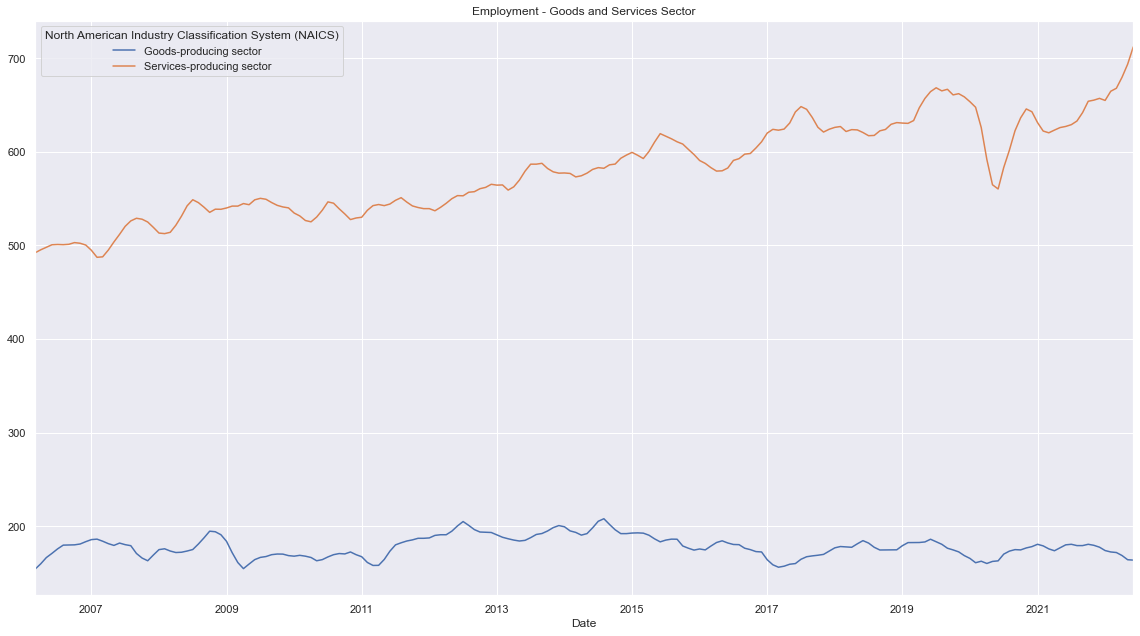

In [27]:
cal_ind_pivot[['Goods-producing sector','Services-producing sector']].plot(figsize=(16,9),xlabel='Date',title='Employment - Goods and Services Sector')
plt.tight_layout()
plt.savefig('kbase_graphs/goods_service.png')

Service sector growth has been steadyily growing for the past 2 decades, while the goods producing sectors saw a clear peak in 2014. While employment in the services sector is approaching pre-COVID highs, goods producing sector continues to be weak. 

This is most likely due to lack of investment in energy related development/businesses since the energy crisis in 2014. 

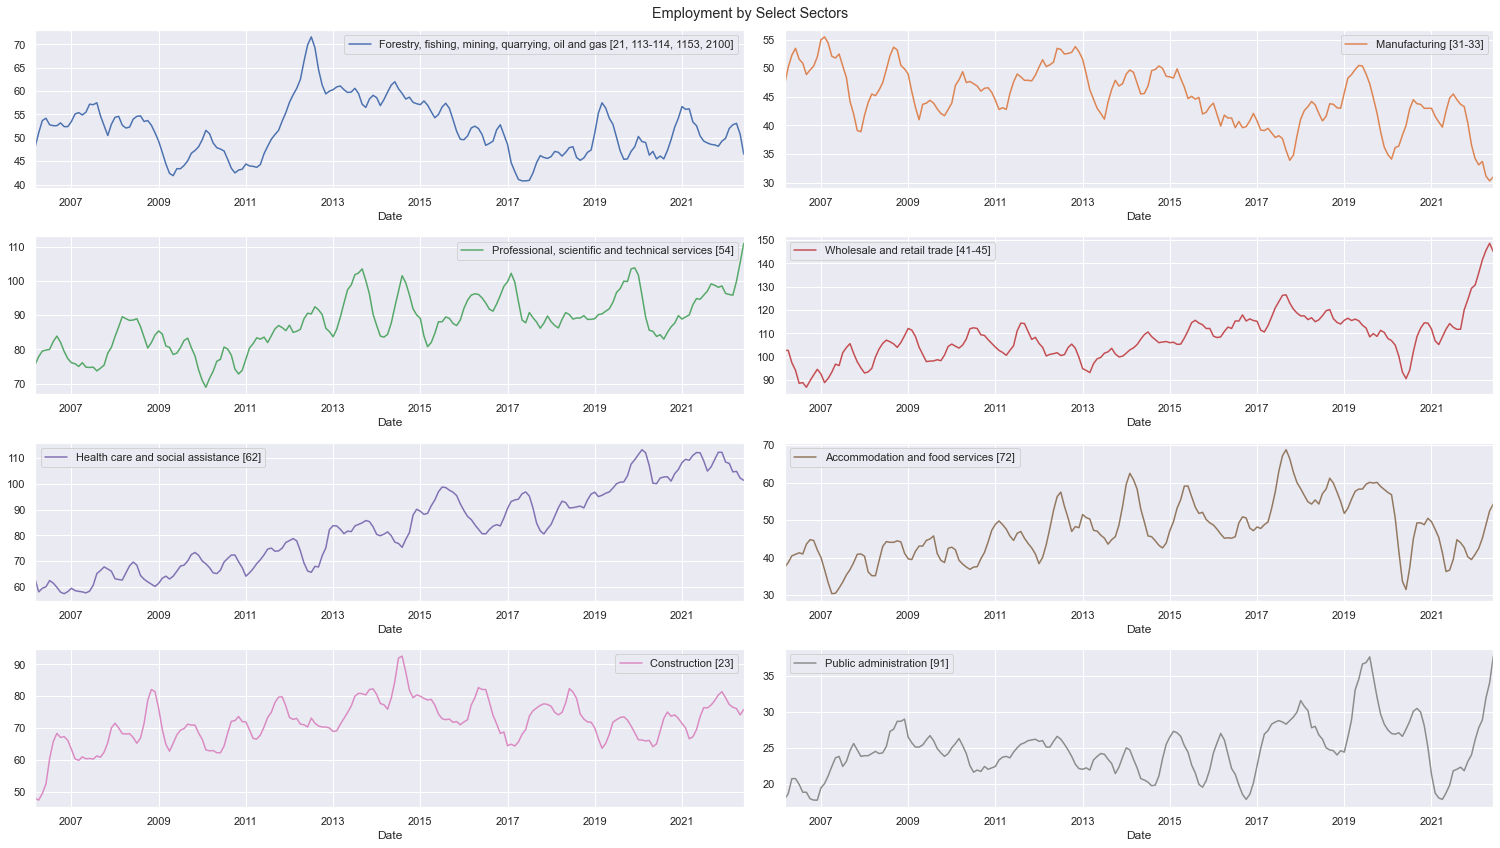

In [28]:
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(21,12))
cal_ind_pivot[['Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100]','Manufacturing [31-33]','Professional, scientific and technical services [54]',"Wholesale and retail trade [41-45]",'Health care and social assistance [62]','Accommodation and food services [72]','Construction [23]','Public administration [91]']].plot(ax= axes,subplots=True, title='Employment by Select Sectors')
plt.tight_layout()
plt.savefig('kbase_graphs/sector_employ.png')

The healthcare and social assistance sector has seen the steadiest growth in recent years, with clear boons related to the pandemic. Wholesale and retail trade has also largely increased since the pandemic lows, pointing to increased consumer demand.

On the other hand, accomodation and food services employment is clearly still very weak, indicating a reluctance to increase employment in those businesses before travel demand has clearly returned. 

The Construction industry has also seen relative gains this year, as indicated by strong starts activity in 2020 and 2021.

Oil and gas (raw materials) related unemployment is still well below 2012 highs. It does however seem to be reversing its downtrend in recent years.

C:\Users\mmak\AppData\Local\Temp\ipykernel_24948\2465362478.py:2: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  cal_ind_pivot['2019':][['Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100]','Manufacturing [31-33]','Professional, scientific and technical services [54]',"Wholesale and retail trade [41-45]",'Health care and social assistance [62]','Accommodation and food services [72]','Construction [23]','Public administration [91]']].plot(ax=axes,


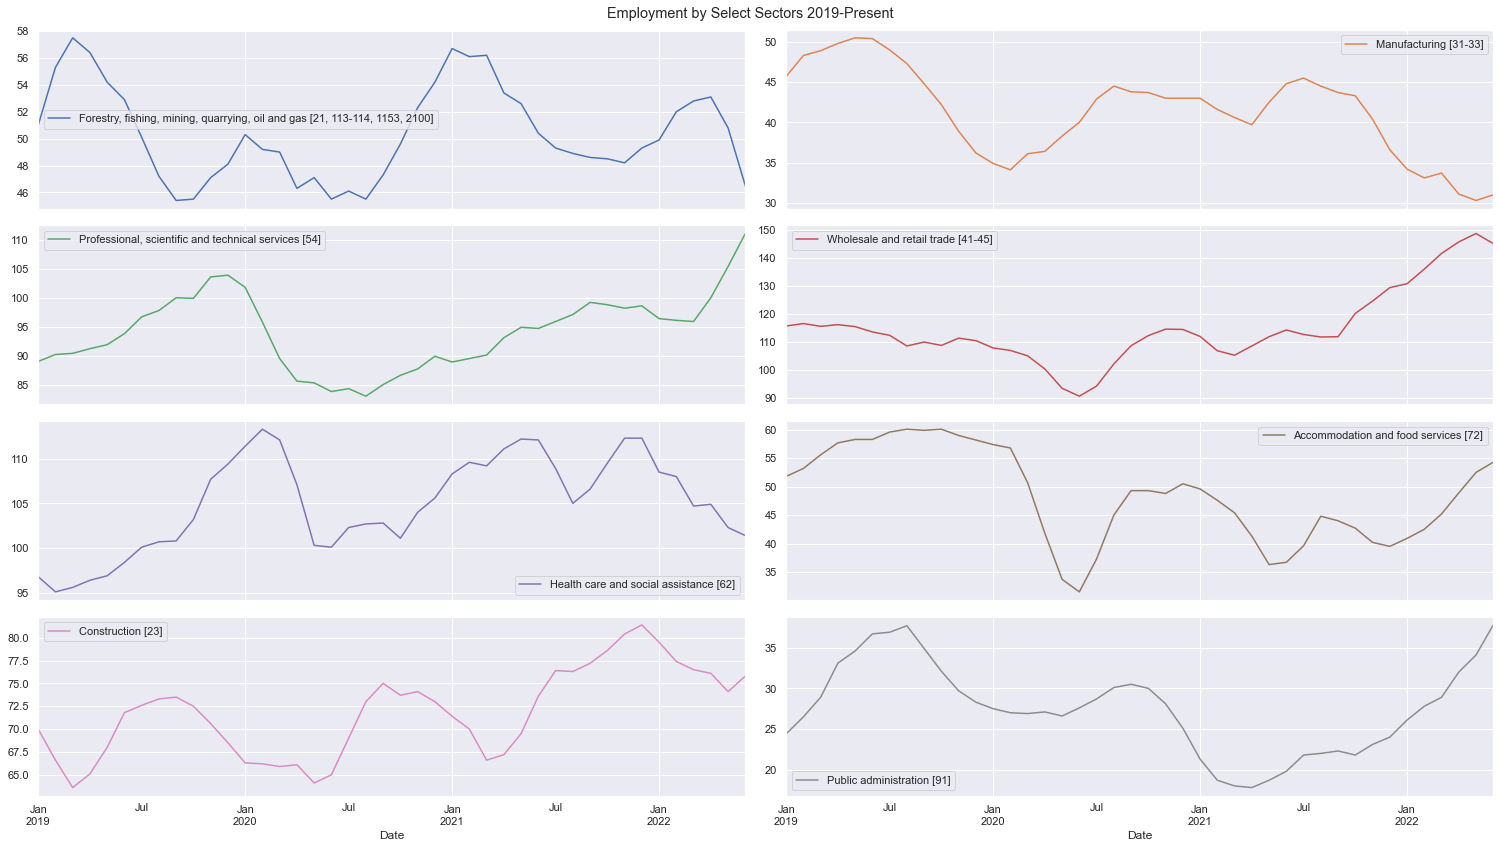

In [29]:
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(21,12))
cal_ind_pivot['2019':][['Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100]','Manufacturing [31-33]','Professional, scientific and technical services [54]',"Wholesale and retail trade [41-45]",'Health care and social assistance [62]','Accommodation and food services [72]','Construction [23]','Public administration [91]']].plot(ax=axes, 
subplots=True, title = "Employment by Select Sectors 2019-Present",sharex=True)
plt.tight_layout()
plt.savefig('kbase_graphs/sector_employ_short.png')


A closer look at employment shows more recent and relative trends.

In [30]:
cal_ind_pivot.diff(24)['2019':].tail(12)

North American Industry Classification System (NAICS),Accommodation and food services [72],"Agriculture [111-112, 1100, 1151-1152]","Business, building and other support services [55-56]",Construction [23],Educational services [61],"Finance, insurance, real estate, rental and leasing [52-53]","Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100]",Goods-producing sector,Health care and social assistance [62],"Information, culture and recreation [51, 71]",Manufacturing [31-33],Other services (except public administration) [81],"Professional, scientific and technical services [54]",Public administration [91],Services-producing sector,"Total employed, all industries",Transportation and warehousing [48-49],Utilities [22],Wholesale and retail trade [41-45]
Date,,,,,,,,,,,,,,,,,,,
2021-07-01,-20.0,-1.3,-8.9,3.8,17.4,5.0,-0.8,-2.7,8.8,-5.3,-3.5,-10.9,-0.8,-15.1,-39.4,-42.1,-10.0,-0.8,0.3
2021-08-01,-15.3,-1.5,-6.4,3.0,9.5,8.3,1.7,-1.4,4.3,-3.6,-2.8,-11.3,-0.7,-15.7,-32.2,-33.7,-4.5,-1.8,3.2
2021-09-01,-15.9,-1.4,-4.3,3.7,2.0,13.7,3.2,2.8,5.8,-1.5,-1.1,-12.5,-0.8,-12.6,-24.9,-22.2,-0.8,-1.6,1.9
2021-10-01,-17.4,-2.3,-2.7,6.1,1.3,16.4,3.0,6.0,6.3,0.4,1.1,-13.8,-1.1,-10.3,-6.8,-0.8,2.7,-1.9,11.4
2021-11-01,-18.8,-3.6,-2.3,9.8,-0.8,18.7,1.1,7.0,4.6,-0.3,1.5,-10.4,-5.4,-6.6,-6.9,0.1,1.2,-1.9,13.2
2021-12-01,-18.7,-3.1,-2.9,12.9,-3.4,17.5,1.2,9.0,2.9,-1.4,0.4,-6.7,-5.3,-4.3,-1.6,7.4,2.0,-2.2,18.9
2022-01-01,-16.5,-1.9,-2.0,13.2,-4.8,16.8,-0.4,8.4,-2.9,0.7,-0.7,-5.0,-5.4,-1.4,1.4,9.8,-0.9,-1.7,22.9
2022-02-01,-14.3,-0.1,-2.6,11.2,-2.4,13.4,2.8,11.5,-5.3,4.8,-1.0,-5.8,0.3,0.8,17.1,28.6,-0.6,-1.3,29.0
2022-03-01,-5.5,-0.3,-2.2,10.6,1.5,10.0,3.8,9.3,-7.4,10.2,-2.4,-8.3,6.4,2.0,41.9,51.2,-1.1,-2.3,36.5


C:\Users\mmak\AppData\Local\Temp\ipykernel_24948\1751910984.py:3: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  cal_ind_pivot.diff(24)['2019':][['Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100]','Manufacturing [31-33]','Professional, scientific and technical services [54]',"Wholesale and retail trade [41-45]",'Health care and social assistance [62]','Accommodation and food services [72]','Construction [23]','Public administration [91]']].plot(ax=axes,


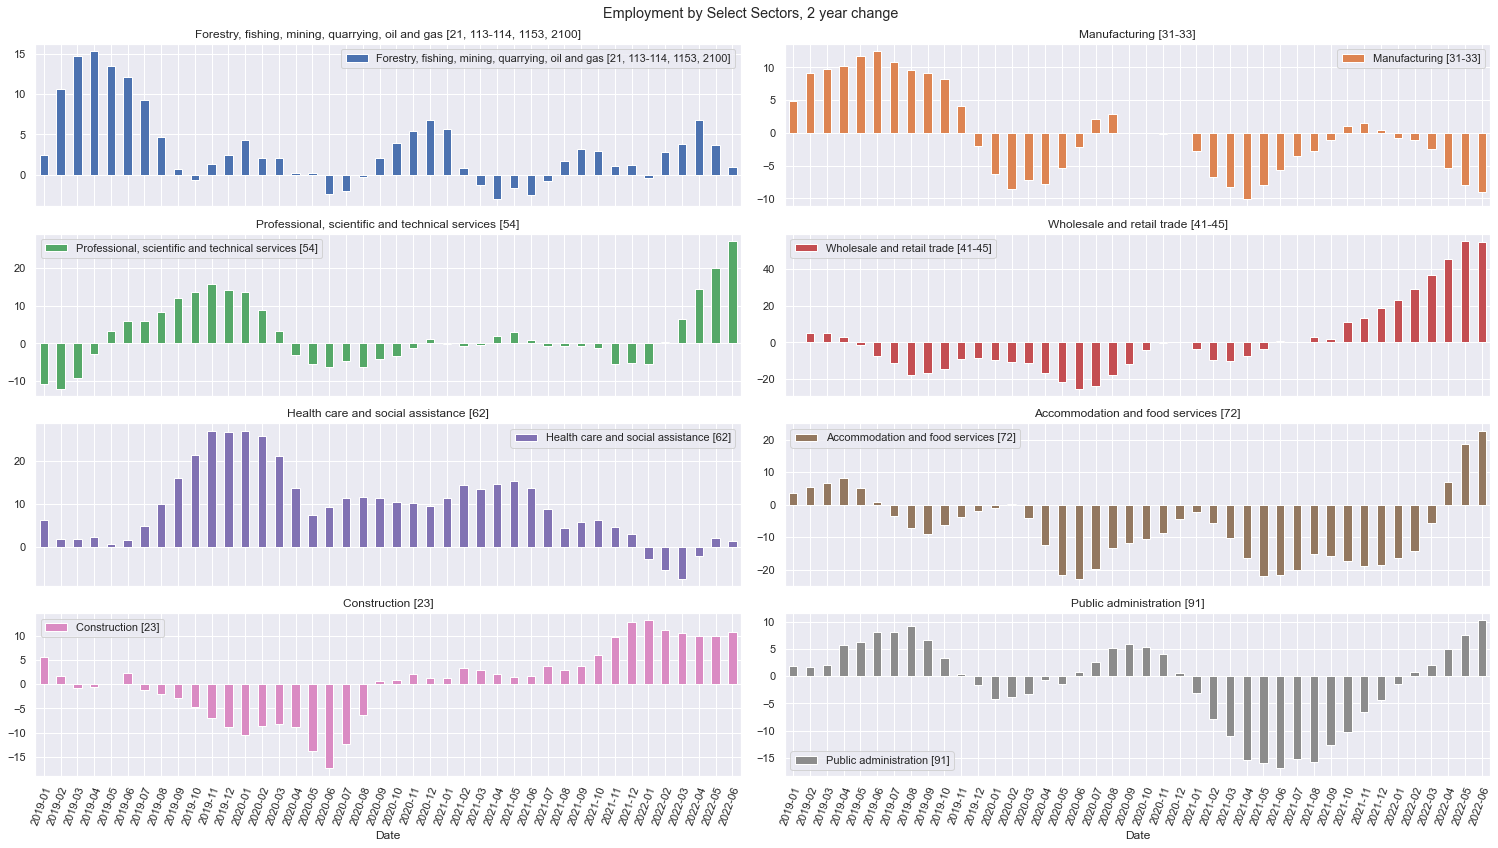

In [31]:
from matplotlib.dates import DateFormatter
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(21,12))
cal_ind_pivot.diff(24)['2019':][['Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100]','Manufacturing [31-33]','Professional, scientific and technical services [54]',"Wholesale and retail trade [41-45]",'Health care and social assistance [62]','Accommodation and food services [72]','Construction [23]','Public administration [91]']].plot(ax=axes, 
subplots=True, title = "Employment by Select Sectors, 2 year change", kind = 'bar',sharex=True)


axes[3,1].set_xticklabels(labels=cal_ind_pivot.diff(24)['2019':].index.to_period('M'), rotation=70, rotation_mode="anchor", ha="right")
axes[3,0].set_xticklabels(labels=cal_ind_pivot.diff(24)['2019':].index.to_period('M'), rotation=70, rotation_mode="anchor", ha="right")


plt.tight_layout()
plt.savefig('kbase_graphs/sector_employ_change.png')

A more clear look at recent changes.

## Energy Markets

### Prices

In [32]:
#commodity = pd.read_excel('..\\data\\WTI_CommIndex_Assumptions.xlsx',index_col=0,engine='openpyxl')

In [76]:
#commodity['WTI'][:'2022'].plot(figsize = (16,9),kind='line', title = 'WTI Spot Price')
#plt.tight_layout()
#plt.savefig('kbase_graphs/wti_spot.png')

In [62]:
commodity=pd.read_csv('https://economicdashboard.alberta.ca/Download/DownloadFile?extension=csv&requestUrl=https%3A%2F%2Feconomicdashboard.alberta.ca%2Fapi%2Foilprice')

In [65]:
commodity['When']=pd.to_datetime(commodity.When)
commodity=commodity.pivot(index='When',columns='Type',values='Alberta')

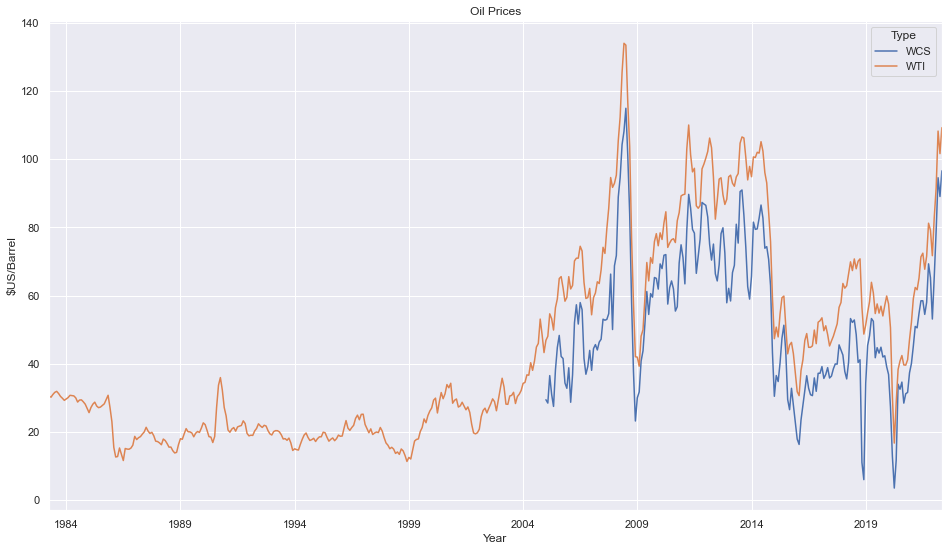

In [66]:
commodity[['WCS','WTI']].plot(figsize = (16,9),kind='line', title = 'Oil Prices',xlabel='Year',ylabel='$US/Barrel')
plt.savefig('kbase_graphs/wti-wcs_spot.png')

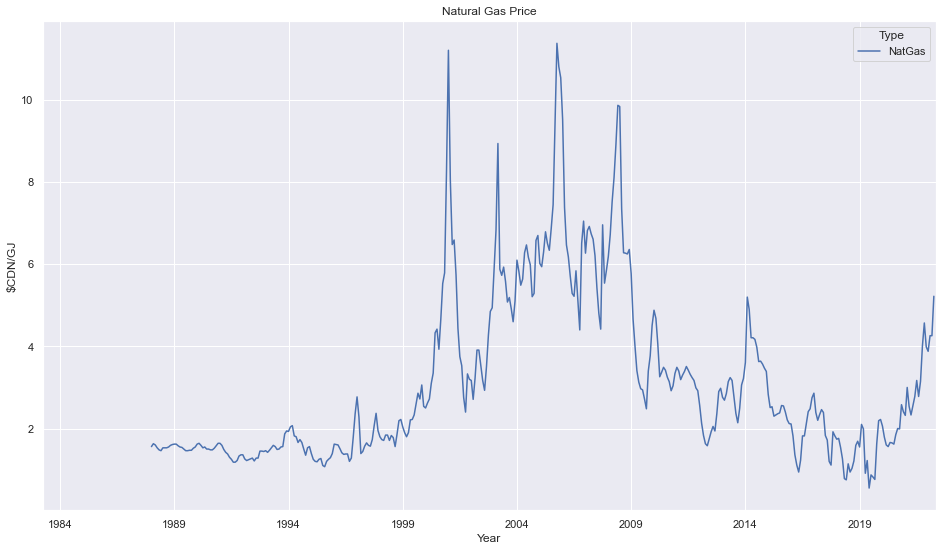

In [68]:
commodity[['NatGas']].plot(figsize = (16,9),kind='line', title = 'Natural Gas Price',xlabel='Year',ylabel='$CDN/GJ')
plt.savefig('kbase_graphs/natgas_spot.png')

Lastly a look at oil - economic reopening has led to increased demand for oil due to increased travel, transports, shipping and overall consumer demand. Supply on the other hand, has not caught up due to years of underinvestment. This resulted in quickly increasing oil prices admist the backdrop of a geopolitical crisis in Europe. 

Whether this will lead to reinvestment in oil production remains to be seen.

### Crude Supply

In [77]:
crude_supply = sc.table_to_df('25-10-0063-01')

25100063-eng.zip: 100%|██████████| 487k/487k [00:02<00:00, 217kB/s]  


In [79]:
crude_supply_ab = crude_supply[crude_supply['GEO']=='Alberta']

In [111]:
crude_supply_ab['Supply and disposition'].unique()

array(['Crude oil production', 'Net Field production of crude oil',
       'Heavy crude oil', 'Light and medium crude oil',
       'Non-upgraded production of crude bitumen',
       'In-Situ crude bitumen production',
       'Mined crude bitumen production',
       'Crude bitumen sent for further processing',
       'Synthetic crude oil production', 'Equivalent products production',
       'Condensate', 'Pentanes plus', 'Imports',
       'Imports of crude oil and equivalent products by refineries',
       'Imports of crude oil and equivalent products by other',
       'Input to canadian refineries',
       'Light and medium crude oil used as an input in refineries',
       'Heavy crude oil used as an input in refineries',
       'Crude bitumen used as an input in refineries',
       'Synthetic crude oil used as an input in refineries', 'Exports',
       'Export to the United States',
       'Export to the United States by pipelines',
       'Export to the United States by other means',

In [119]:
crude_supply_ab=crude_supply_ab[crude_supply_ab['Units of measure']=='Barrels']

In [124]:
crude_supply_ab.tail(20)

,REF_DATE,GEO,DGUID,Supply and disposition,Units of measure,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
37155,2022-04-01,Alberta,2016A000248,Imports of crude oil and equivalent products b...,Barrels,Barrels,34,units,0,v107757739,10.16.2,172812.0,NaN,NaN,NaN,0
37157,2022-04-01,Alberta,2016A000248,Input to canadian refineries,Barrels,Barrels,34,units,0,v107757743,10.18.2,13585930.0,NaN,NaN,NaN,0
37159,2022-04-01,Alberta,2016A000248,Light and medium crude oil used as an input in...,Barrels,Barrels,34,units,0,v107757745,10.19.2,3046270.0,NaN,NaN,NaN,0
37161,2022-04-01,Alberta,2016A000248,Heavy crude oil used as an input in refineries,Barrels,Barrels,34,units,0,v107757747,10.20.2,2722848.0,NaN,NaN,NaN,0
37163,2022-04-01,Alberta,2016A000248,Crude bitumen used as an input in refineries,Barrels,Barrels,34,units,0,v107757749,10.21.2,861866.0,NaN,NaN,NaN,0
37165,2022-04-01,Alberta,2016A000248,Synthetic crude oil used as an input in refine...,Barrels,Barrels,34,units,0,v107757753,10.23.2,6954946.0,NaN,NaN,NaN,0
37167,2022-04-01,Alberta,2016A000248,Exports,Barrels,Barrels,34,units,0,v107757755,10.24.2,97699130.0,NaN,NaN,NaN,0
37169,2022-04-01,Alberta,2016A000248,Export to the United States,Barrels,Barrels,34,units,0,v107757757,10.25.2,97103322.0,NaN,NaN,NaN,0
37171,2022-04-01,Alberta,2016A000248,Export to the United States by pipelines,Barrels,Barrels,34,units,0,v107757759,10.26.2,93287345.0,NaN,NaN,NaN,0
37173,2022-04-01,Alberta,2016A000248,Export to the United States by other means,Barrels,Barrels,34,units,0,v107757761,10.27.2,3815978.0,NaN,NaN,NaN,0


In [120]:
crude_supply_ab_pivot=crude_supply_ab.filter(items = ['REF_DATE','Supply and disposition', 'VALUE'])

In [121]:
crude_supply_ab_pivot

,REF_DATE,Supply and disposition,VALUE
329,2016-01-01,Crude oil production,93846609.0
331,2016-01-01,Net Field production of crude oil,61142378.0
333,2016-01-01,Heavy crude oil,3985437.0
335,2016-01-01,Light and medium crude oil,11311545.0
337,2016-01-01,Non-upgraded production of crude bitumen,45845396.0
...,...,...,...
37185,2022-04-01,Refineries,1028779.0
37187,2022-04-01,Closing inventory,74459244.0
37189,2022-04-01,Fields and plants,11599957.0
37191,2022-04-01,Transporters,61894035.0


In [122]:
crude_supply_ab_pivot.pivot(index='REF_DATE',columns='Supply and disposition',values="VALUE")

ValueError: Index contains duplicate entries, cannot reshape

## Construction Costs

In [34]:
building_cost = sc.table_to_df('18-10-0135-01')

18100135-eng.zip: 100%|██████████| 176k/176k [00:00<00:00, 228kB/s]  


In [36]:
building_cost_cal = building_cost[building_cost['GEO']=='Calgary, Alberta']

In [73]:
building_cost_cal['Type of building'].unique()

array(['Residential buildings [621]', 'Apartment buildings',
       'High-rise apartment building (five or more storeys)',
       'Low-rise apartment building (fewer than five storeys)',
       'Single-detached house', 'Townhouse',
       'Non-residential buildings [622]', 'Commercial buildings [62212]',
       'Office building', 'Warehouse', 'Shopping centre',
       'Industrial buildings [62211]', 'Factory',
       'Bus depot with maintenance and repair facilities',
       'Institutional buildings [62213]', 'School'], dtype=object)

In [74]:
building_cost_cal.tail(len(building_cost_cal['Type of building'].unique()))

,REF_DATE,GEO,DGUID,Type of building,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
31632,2022-01-01,"Calgary, Alberta",2016S0503825,Residential buildings [621],"Index, 2017=100",373,units,0,v122668061,10.1,164.4,NaN,NaN,NaN,1
31633,2022-01-01,"Calgary, Alberta",2016S0503825,Apartment buildings,"Index, 2017=100",373,units,0,v122668063,10.3,153.0,NaN,NaN,NaN,1
31634,2022-01-01,"Calgary, Alberta",2016S0503825,High-rise apartment building (five or more sto...,"Index, 2017=100",373,units,0,v122668064,10.4,125.8,NaN,NaN,NaN,1
31635,2022-01-01,"Calgary, Alberta",2016S0503825,Low-rise apartment building (fewer than five s...,"Index, 2017=100",373,units,0,v122668065,10.5,158.1,NaN,NaN,NaN,1
31636,2022-01-01,"Calgary, Alberta",2016S0503825,Single-detached house,"Index, 2017=100",373,units,0,v122668066,10.6,169.3,NaN,NaN,NaN,1
31637,2022-01-01,"Calgary, Alberta",2016S0503825,Townhouse,"Index, 2017=100",373,units,0,v122668067,10.7,174.4,NaN,NaN,NaN,1
31638,2022-01-01,"Calgary, Alberta",2016S0503825,Non-residential buildings [622],"Index, 2017=100",373,units,0,v122668068,10.8,115.1,NaN,NaN,NaN,1
31639,2022-01-01,"Calgary, Alberta",2016S0503825,Commercial buildings [62212],"Index, 2017=100",373,units,0,v122668069,10.9,115.4,NaN,NaN,NaN,1
31640,2022-01-01,"Calgary, Alberta",2016S0503825,Office building,"Index, 2017=100",373,units,0,v122668070,10.10,112.2,NaN,NaN,NaN,1
31641,2022-01-01,"Calgary, Alberta",2016S0503825,Warehouse,"Index, 2017=100",373,units,0,v122668071,10.11,117.8,NaN,NaN,NaN,1


In [82]:
building_cost_cal=building_cost_cal.filter(items = ['REF_DATE','Type of building', 'VALUE'])

,REF_DATE,Type of building,VALUE
144,1981-01-01,Residential buildings [621],NaN
145,1981-01-01,Apartment buildings,NaN
146,1981-01-01,High-rise apartment building (five or more sto...,NaN
147,1981-01-01,Low-rise apartment building (fewer than five s...,NaN
148,1981-01-01,Single-detached house,NaN
...,...,...,...
31643,2022-01-01,Industrial buildings [62211],117.5
31644,2022-01-01,Factory,118.9
31645,2022-01-01,Bus depot with maintenance and repair facilities,115.6
31646,2022-01-01,Institutional buildings [62213],112.9


In [87]:
building_cost_cal=building_cost_cal.pivot(index='REF_DATE',columns='Type of building',values="VALUE")

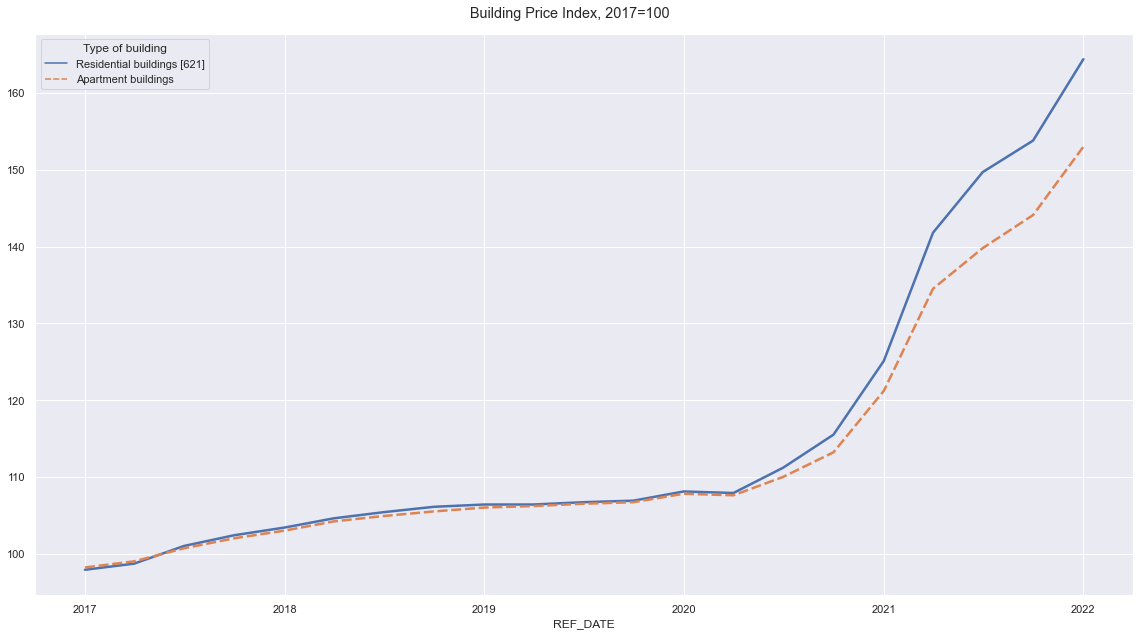

In [94]:
fig,ax=plt.subplots(figsize=(16,9))

sns.lineplot(data=building_cost_cal[['Residential buildings [621]','Apartment buildings']],linewidth=2.5,ax=ax)
fig.suptitle('Building Price Index, 2017=100')
fig.tight_layout()
plt.savefig('building_price.png')

Construction costs shot sharply higher shortly after the onset of the pandemic. Residential buildings in general seem to be outpacing the subset of apartment buildings.

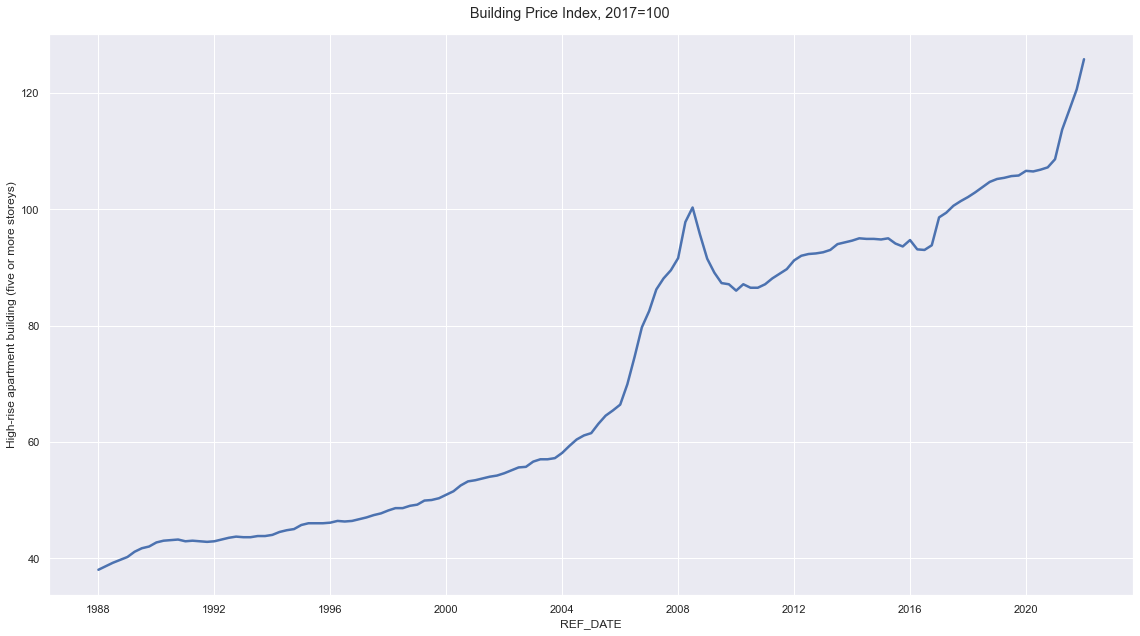

In [99]:
fig,ax=plt.subplots(figsize=(16,9))

sns.lineplot(data=building_cost_cal['High-rise apartment building (five or more storeys)'],linewidth=2.5,ax=ax)
fig.suptitle('Building Price Index, 2017=100')
fig.tight_layout()
plt.savefig('building_price_apt.png')

We can see that the cost of building high rises also shot up in early 2000s, the same time as major increases in housing demand in Calgary. This peaked in early 2008 as the economy entered a recession, and the Great Financial Crisis began. There was no similar increase in construction costs for apartments in the early 2010s oil boom era, but current cost increases also reflect demand for new housing.

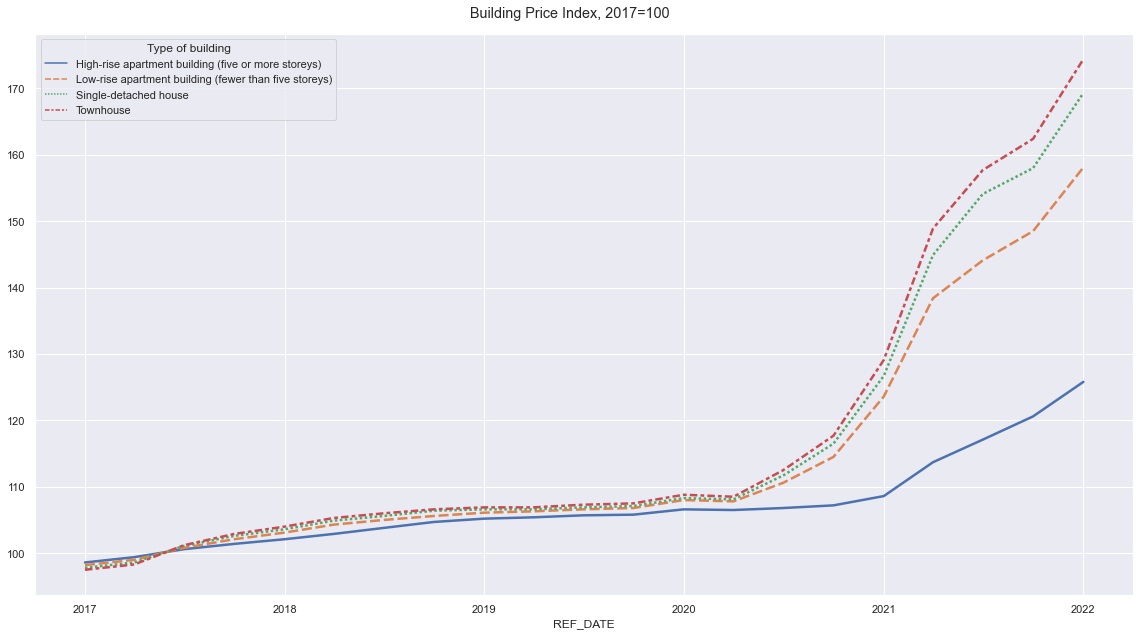

In [101]:
fig,ax=plt.subplots(figsize=(16,9))

sns.lineplot(data=building_cost_cal[['High-rise apartment building (five or more storeys)',
       'Low-rise apartment building (fewer than five storeys)',
       'Single-detached house', 'Townhouse']]['2017':],linewidth=2.5,ax=ax)
fig.suptitle('Building Price Index, 2017=100')
fig.tight_layout()
plt.savefig('building_price_types.png')

When broken out by building type, townhomes and single detached homes increased the fastest, while low-rise costs grew slower, and high-rise apartments grew the slowest, potentially from economies of scale. 

In [105]:
building_cost_cal[['High-rise apartment building (five or more storeys)',
       'Low-rise apartment building (fewer than five storeys)',
       'Single-detached house', 'Townhouse']]['2016':].pct_change(4)['2017':]

Type of building,High-rise apartment building (five or more storeys),Low-rise apartment building (fewer than five storeys),Single-detached house,Townhouse
REF_DATE,,,,
2017-01-01,0.041183,NaN,NaN,NaN
2017-04-01,0.067669,NaN,NaN,NaN
2017-07-01,0.081720,NaN,NaN,NaN
2017-10-01,0.081023,NaN,NaN,NaN
2018-01-01,0.035497,0.049898,0.059305,0.066667
2018-04-01,0.035211,0.053535,0.063895,0.071211
2018-07-01,0.031809,0.041667,0.044510,0.047431
2018-10-01,0.032544,0.034280,0.037037,0.035957
2019-01-01,0.030362,0.029098,0.028958,0.027885


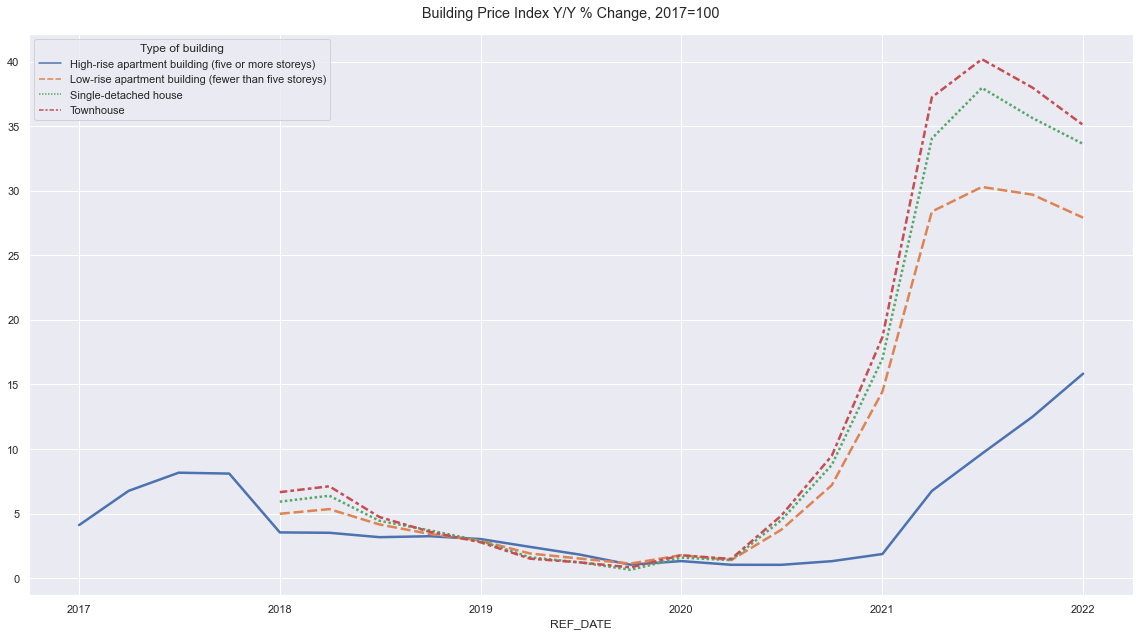

In [108]:
fig,ax=plt.subplots(figsize=(16,9))

sns.lineplot(data=building_cost_cal[['High-rise apartment building (five or more storeys)',
       'Low-rise apartment building (fewer than five storeys)',
       'Single-detached house', 'Townhouse']]['2016':].pct_change(4)['2017':]*100,linewidth=2.5,ax=ax)

fig.suptitle('Building Price Index Y/Y % Change, 2017=100')
fig.tight_layout()
plt.savefig('building_price_pct.png')

A year over year look at these cost changes show that this growth peaked in mid 2021 for most building types, but is still in the 30% area. High rise year/year costs continue to increase as of the last data point.